# Shiftworker analysis

In [1]:
from hypnospy import Wearable
from hypnospy.data import RawProcessing
from hypnospy.analysis import Viewer, NonWearingDetector, SleepBoudaryDetector, SleepWakeAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'h5py'

In [32]:
pp = RawProcessing("./data/shiftworker/Shiftworker.csv",
                           # HR information
                           col_for_hr="mean_hr",
                           # Activity information
                           cols_for_activity=["ACC"],
                           is_act_count=True,
                           # Datetime information
                           col_for_datetime="real_time",
                           strftime="%d/%m/%Y %H:%M",
                           # Participant information
                           col_for_pid="id")

w = Wearable(pp)

#Check out data columns
#print(w.data.head(10))

   timepoint         real_time  cluster_0  cluster_1  cluster_2    ACC  \
0        -30  17/11/2008 10:53        NaN        NaN        NaN  0.192   
1        -29  17/11/2008 10:54        NaN        NaN        NaN  0.192   
2        -28  17/11/2008 10:55        NaN        NaN        NaN  0.192   
3        -27  17/11/2008 10:56        NaN        NaN        NaN  0.192   
4        -26  17/11/2008 10:57        NaN        NaN        NaN  0.192   
5        -25  17/11/2008 10:58        NaN        NaN        NaN  0.192   
6        -24  17/11/2008 10:59        NaN        NaN        NaN  0.192   
7        -23  17/11/2008 11:00        NaN        NaN        NaN  0.192   
8        -22  17/11/2008 11:01        NaN        NaN        NaN  0.192   
9        -21  17/11/2008 11:02        NaN        NaN        NaN  0.192   

   mean_hr  lower_hr  upper_hr  rawhr  ...  P_TR_ACC_min_20  P_TR_ACC_min_21  \
0   78.285    58.417   105.434    NaN  ...              NaN              NaN   
1   78.245    58.390   10

In [33]:
#Define parameters fo HR-based sleep algorithm
hr_quantile = 0.4
hr_min_window_length = 60
hr_merge_blocks = 180
hr_volarity = 5

#Time to consider as start and end of each experiment day - if equal the sleep labelling occurs
#over the entire 24 hours
start_hour = 18
end_hour = 18

C:\Users\mariu\OneDrive - University of Cambridge\HypnosPy\hypnospy\misc.py:82: UserWarning: Could not find any valid sequence. Aborting.
  warnings.warn("Could not find any valid sequence. Aborting.")
C:\Users\mariu\OneDrive - University of Cambridge\HypnosPy\hypnospy\misc.py:82: UserWarning: Could not find any valid sequence. Aborting.
  warnings.warn("Could not find any valid sequence. Aborting.")
C:\Users\mariu\OneDrive - University of Cambridge\HypnosPy\hypnospy\misc.py:40: UserWarning: Day has no valid elements for column hyp_sleep_candidate.
  warnings.warn("Day has no valid elements for column %s." % candidate)
C:\Users\mariu\OneDrive - University of Cambridge\HypnosPy\hypnospy\misc.py:40: UserWarning: Day has no valid elements for column hyp_sleep_candidate.
  warnings.warn("Day has no valid elements for column %s." % candidate)
C:\Users\mariu\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing 

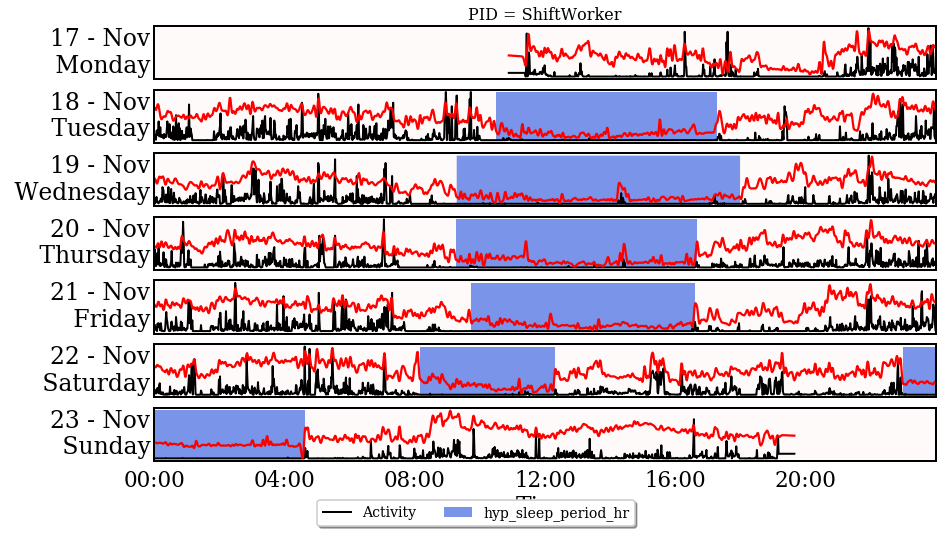

In [35]:
# Label sleep using HypnosPy HR algorithms

sbd = SleepBoudaryDetector(w)

sbd.detect_sleep_boundaries(strategy="hr", output_col="hyp_sleep_period_hr", hr_quantile=hr_quantile,
                                hr_volarity_threshold=hr_volarity, hr_rolling_win_in_minutes=5,
                                hr_sleep_search_window=(start_hour, end_hour),
                                hr_min_window_length_in_minutes=hr_min_window_length,
                                hr_volatility_window_in_minutes=10, hr_merge_blocks_gap_time_in_min=hr_merge_blocks,
                                hr_sleep_only_in_sleep_search_window=True, hr_only_largest_sleep_period=True)

#Plot sleep labels together with HR and acitivty signals
v = Viewer(w)

v.view_signals(["activity", "hr", "sleep"],
                sleep_cols=["hyp_sleep_period_hr"],
              alphas={'sleep': 0.3})